### Numpy files for Deep Learning

Here is a script that does the following:

- Reads the positions (RA, DEC) of objects (LSBGs/artifacts).

- Gets cutouts from the DECaLS legacy viewer - saves them as jpg images.

- Converts them into numpy arrays.

In [1]:
import numpy as np 
import pandas as pd
import urllib
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
# ====================================
# Adjust rc parameters to make plots pretty
# def plot_pretty(dpi=200, fontsize=9):
    
#     import matplotlib.pyplot as plt

#     plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
#     # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
#     #plt.rc('text', usetex=True)      # use LaTeX to process labels
#     plt.rc('font', size=fontsize)    # fontsize
#     plt.rc('xtick', direction='in')  # make axes ticks point inward
#     plt.rc('ytick', direction='in')
#     plt.rc('xtick.major', pad=10) 
#     plt.rc('xtick.minor', pad=5)
#     plt.rc('ytick.major', pad=10) 
#     plt.rc('ytick.minor', pad=5)
#     plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

#     return
# plot_pretty()

Now read the files that contains RAs and DECs 

In [2]:
df = pd.read_csv('Datasets\\random_LSBGs_all.csv')

print(df.columns)

Index(['Unnamed: 0', 'coadd_id', 'ra', 'dec', 'A_IMAGE', 'B_IMAGE',
       'mag_auto_g', 'flux_radius_g', 'mu_max_g', 'mu_max_model_g',
       'mu_eff_model_g', 'mu_mean_model_g', 'mag_auto_r', 'flux_radius_r',
       'mu_max_r', 'mu_max_model_r', 'mu_eff_model_r', 'mu_mean_model_r',
       'mag_auto_i', 'flux_radius_i', 'mu_max_i', 'mu_max_model_i',
       'mu_eff_model_i', 'mu_mean_model_i'],
      dtype='object')


In [2]:
df = pd.read_csv('Datasets\\random_negative_all_2.csv').drop(columns=['Unnamed: 0'])
df.head()

,coadd_id,ra,dec,A_IMAGE,B_IMAGE,mag_auto_g,flux_radius_g,mu_max_g,mu_max_model_g,mu_eff_model_g,...,mu_max_r,mu_max_model_r,mu_eff_model_r,mu_mean_model_r,mag_auto_i,flux_radius_i,mu_max_i,mu_max_model_i,mu_eff_model_i,mu_mean_model_i
0,316310989.0,40.090740,-4.445404,4.717010,2.354342,21.472155,3.293440,24.441231,24.964153,26.764791,...,23.634071,24.127546,25.925787,25.228838,20.717335,3.198911,23.218655,23.792841,25.579319,24.886490
1,497492000.0,65.921443,-22.396546,6.285618,3.290936,21.466034,2.864123,24.185545,24.437744,26.237934,...,23.876196,23.950928,25.750076,25.053593,20.791466,2.690540,23.249422,23.526728,25.328304,24.628597
2,508340073.0,70.732828,-41.048892,4.047899,1.414522,22.233032,2.719934,23.815443,24.855452,26.587549,...,23.831644,24.261894,26.044979,25.336315,21.610502,2.131606,23.459972,23.383272,25.165167,24.459820
3,503163353.0,71.141644,-26.290225,4.369693,4.113105,21.683304,2.599894,23.909100,23.563255,25.365139,...,23.640265,23.607225,25.409803,24.710609,20.854940,2.551759,23.435854,23.439079,25.239449,24.540735
4,335599317.0,45.137313,-15.279261,2.830348,1.821607,21.584328,3.258073,24.377985,25.106985,26.907234,...,23.945517,24.284058,26.090330,25.391094,21.133919,3.044972,23.703569,24.384443,26.189703,25.491930


In [3]:
df.describe()

,coadd_id,ra,dec,A_IMAGE,B_IMAGE,mag_auto_g,flux_radius_g,mu_max_g,mu_max_model_g,mu_eff_model_g,...,mu_max_r,mu_max_model_r,mu_eff_model_r,mu_mean_model_r,mag_auto_i,flux_radius_i,mu_max_i,mu_max_model_i,mu_eff_model_i,mu_mean_model_i
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.863232e+08,109.596158,-34.316772,6.396814,4.056998,20.936268,3.543025,24.044609,24.411302,26.208668,...,23.518768,23.849561,25.647473,24.949607,20.239053,3.413908,23.113206,23.623872,25.421523,24.723652
std,1.289891e+08,121.503193,19.760831,4.173100,2.448127,0.850333,1.573827,0.486678,0.713172,0.714225,...,0.588034,0.740357,0.741181,0.741179,0.874653,1.469889,0.567647,0.849692,0.850575,0.850566
min,6.144459e+07,0.001833,-67.990469,1.637515,0.869023,16.570465,2.500064,20.453768,23.193708,24.994274,...,19.009745,20.047169,21.851511,21.154510,16.155161,0.432191,19.049513,18.455441,20.256611,19.560644
25%,1.774375e+08,29.086678,-50.918269,3.879217,2.536283,20.473436,2.705184,23.726779,23.799663,25.595591,...,23.182642,23.295803,25.092914,24.395589,19.766100,2.595209,22.820467,23.040861,24.835731,24.137569
50%,2.877727e+08,56.023767,-37.823775,5.457261,3.507313,21.062002,3.036791,24.094972,24.407214,26.202474,...,23.603534,23.870780,25.667086,24.969373,20.359484,3.005009,23.211360,23.643982,25.440159,24.742844
75%,3.915918e+08,91.850207,-20.146543,7.410317,4.859421,21.540846,3.721039,24.400708,24.989111,26.786563,...,23.949211,24.425955,26.223461,25.526089,20.849342,3.717837,23.514487,24.266883,26.066526,25.369053
max,6.186653e+08,359.993056,5.493875,43.225853,25.014742,24.047089,18.872257,25.831200,27.099737,28.903467,...,26.153366,25.479753,27.285002,26.585423,24.128864,15.781782,25.241789,25.881157,27.685057,26.986849


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def sky_plot(ra,dec):
    # Load your dataset (assuming it's a DataFrame)
    #df = pd.read_csv("your_dataset.csv")  # Replace with actual dataset

    # Convert RA from degrees to radians (RA is usually 0-360° but Mollweide requires -180° to 180°)
    ra_rad = np.radians(ra)
    ra_rad = np.where(ra_rad > np.pi, ra_rad - 2 * np.pi, ra_rad)  # Convert to range [-π, π]

    # Convert DEC from degrees to radians
    dec_rad = np.radians(dec)

    # Plot using Mollweide projection
    plt.figure(figsize=(10, 5))
    ax = plt.subplot(111, projection="mollweide")

    # Scatter plot of RA/DEC
    ax.scatter(ra_rad, dec_rad, s=1, color="blue", alpha=0.5)  # Adjust s (size) for visibility

    # Grid and Labels
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
    ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h", "0h", "2h", "4h", "6h", "8h", "10h"])
    ax.set_xlabel("Right Ascension (RA)")
    ax.set_ylabel("Declination (DEC)")
    ax.set_title("Sky Map of Objects (Mollweide Projection)")

    plt.show()


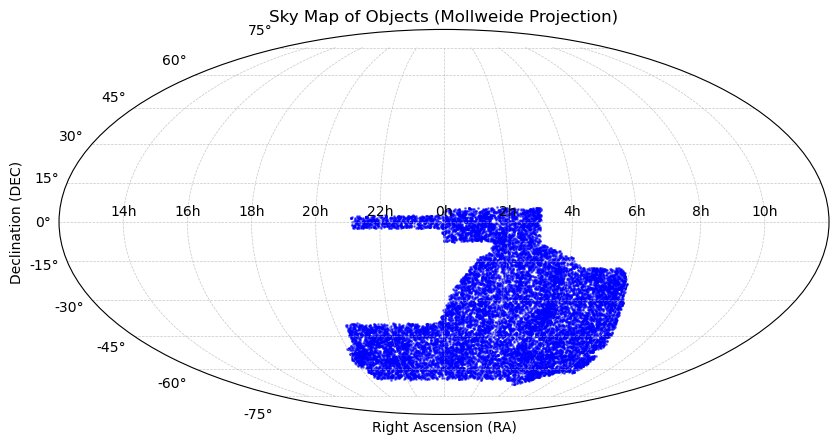

In [5]:
sky_plot(df['ra'],df['dec'])

In [8]:
from sklearn.cluster import MiniBatchKMeans

n_clusters = 10000  # Adjust the number of clusters for balance

# Convert RA/DEC into Cartesian coordinates for better clustering
ra_rad = np.radians(df["ra"])
dec_rad = np.radians(df["dec"])

x = np.cos(dec_rad) * np.cos(ra_rad)
y = np.cos(dec_rad) * np.sin(ra_rad)
z = np.sin(dec_rad)

# Apply K-Means
coords = np.vstack([x, y, z]).T  # Create coordinate matrix
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(coords)

# Pick one random sample per cluster
df_sampled = df.groupby("cluster").apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)
df_sampled = df_sampled.drop(columns=["cluster"])  # Remove cluster column

print(f"Original size: {len(df)}, Sampled size: {len(df_sampled)}")


Original size: 20000, Sampled size: 8692


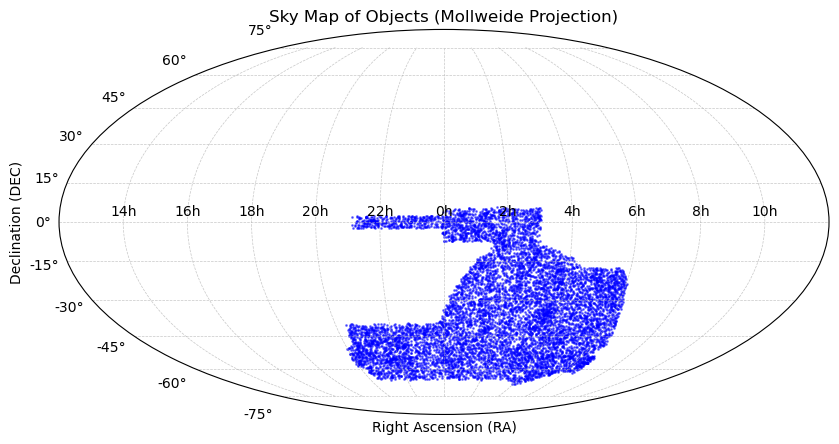

In [9]:
sky_plot(df_sampled['ra'],df_sampled['dec'])

In [9]:
# Initialize array
# Array = np.zeros([10,64,64,3])

In [ ]:
import os
import time
import urllib.request
import pandas as pd
import numpy as np
from PIL import Image
from IPython.display import clear_output

# Define directory for storing images
IMAGE_DIR = "datasets_img\\neg_typ_2"
os.makedirs(IMAGE_DIR, exist_ok=True)  # Create directory if it doesn’t exist

# Define zoom level for images
ZOOM = 15
SIZE = 128

# Load or create sampled dataset
SAMPLED_DF_PATH = f"Datasets\\neg_typ_2_{n_clusters}_clust_sample.csv"

if os.path.exists(SAMPLED_DF_PATH):
    df_sampled = pd.read_csv(SAMPLED_DF_PATH)  # Load existing data to resume
    print("Loaded existing sampled dataset.")
else:
    print("No sampled dataset found. Please generate it first!")
    exit()

# Function to download images
def download_images(df):
    """
    Downloads sky survey images using RA & DEC, saves them with `coadd_id` in the filename,
    and allows resuming in case execution stops.
    """
    start_time = time.time()
    
    df.to_csv(SAMPLED_DF_PATH, index=False)
    
    for index, row in df.iterrows():
        coadd_id = int(row["coadd_id"])  # Convert to integer for filename
        ra, dec = row["ra"], row["dec"]

        # Image filename
        img_filename = os.path.join(IMAGE_DIR, f"Image_{coadd_id}.jpg")

        # Skip if image already exists (resuming mechanism)
        if os.path.exists(img_filename):
            print(f"Skipping {img_filename} (already downloaded)")
            continue

        # Construct the URL
        url = f"http://legacysurvey.org//viewer/jpeg-cutout?ra={ra}&dec={dec}&zoom={ZOOM}&layer=des-dr1"

        try:
            # Download image
            urllib.request.urlretrieve(url, img_filename)

            # Resize the image to 64x64 pixels
            image = Image.open(img_filename)
            new_image = image.resize((SIZE, SIZE))
            new_image.save(img_filename)  # Overwrite with resized image

            clear_output(wait=True)  # Clear output for cleaner display
            print(f"Downloaded: {img_filename} ({index+1}/{len(df)})")

        except Exception as e:
            print(f"Failed to download {img_filename}: {e}")

    # Save DataFrame after downloading images
    print("All images downloaded successfully!")
    
    # Print time taken
    elapsed_time = (time.time() - start_time) / 60
    print(f"Total time elapsed: {elapsed_time:.2f} minutes")

# Run image download process
download_images(df_sampled)


Downloaded: datasets_img\neg_typ_2\Image_498426601.jpg (8692/8692)
All images downloaded successfully!
Total time elapsed: 325.95 minutes


: 

In [19]:
pip install urllib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
np.save('Negative_sample_1_4', Array)

In [ ]:
#plt.imshow(new_image)